In [2]:
import pandas as pd
import librosa
import IPython.display as ipd
import sklearn.preprocessing as skl_prepro
import librosa.display
import matplotlib.pyplot as plt
from Project_Spotify_502 import utils
import numpy as np
from tensorflow.keras.backend import expand_dims

In [3]:
%load_ext autoreload
%autoreload 2

In [21]:
filename = '../raw_data/fma_medium/000/000002.mp3'
x, sr = librosa.load(filename, sr=None, mono=True)

/home/achille/.pyenv/versions/3.8.5/envs/spotify_502/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [43]:
filename = librosa.example('nutcracker')

x, sr = librosa.load(filename, sr=None, mono=True)

In [44]:
stft = np.abs(librosa.stft(x[7*sr: 17*sr], n_fft=2048, hop_length=512))

In [45]:
mel = librosa.feature.melspectrogram(sr=sr, S=librosa.amplitude_to_db(stft))

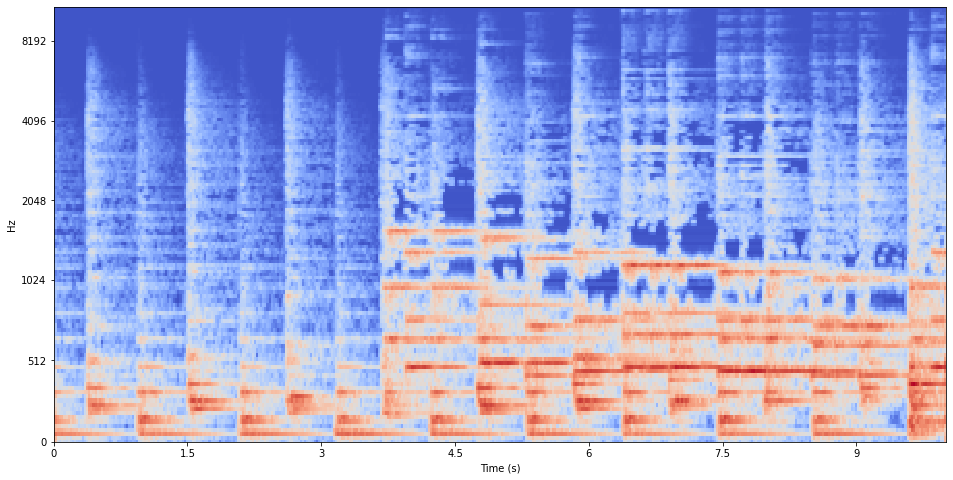

In [46]:
fig, ax = plt.subplots(1,1,figsize=(16,8))
librosa.display.specshow(mel, sr=sr, hop_length=512, x_axis='s', y_axis='mel');

In [47]:
print('Duration: {:.2f}s, {} samples'.format(x.shape[-1] / sr, x.size))


ipd.Audio(data=x[7*sr: 17*sr], rate=sr)

Duration: 119.88s, 2643264 samples


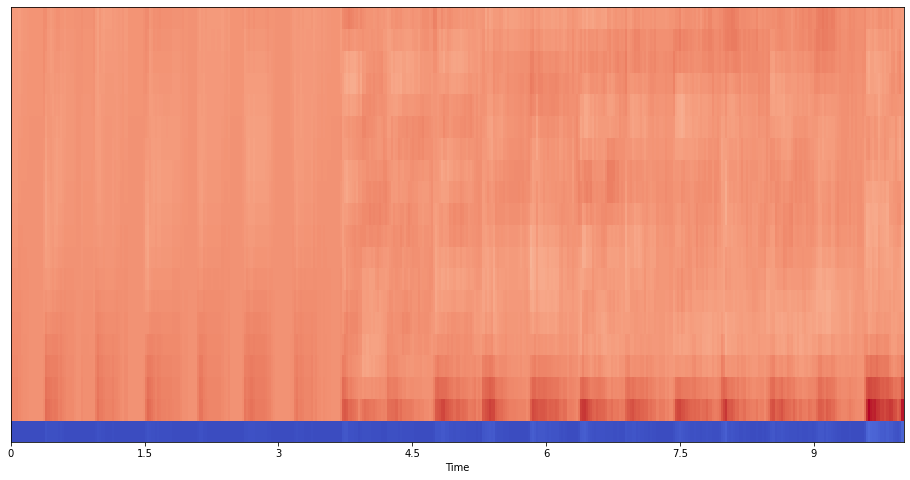

In [10]:
mfcc = librosa.feature.mfcc(S=librosa.power_to_db(mel), n_mfcc=20)
mfcc = skl_prepro.StandardScaler().fit_transform(mfcc)

fig, ax = plt.subplots(1,1,figsize=(16,8))
librosa.display.specshow(mfcc, sr=sr, x_axis='time', ax=ax);